In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('kmeans - Sheet1.csv')

In [3]:
df.isnull().count()

Dependency       2507
AvailNorm        2507
throughNorm      2507
successNorm      2507
reliableNORM     2507
compliantNorm    2507
bestpracNorm     2507
latencyNorm      2507
documentNorm     2507
k_Means          2507
dtype: int64

In [4]:
df.sample(6)

,Dependency,AvailNorm,throughNorm,successNorm,reliableNORM,compliantNorm,bestpracNorm,latencyNorm,documentNorm,k_Means
1091,0.026450,0.20430,0.17674,0.19565,0.35714,1.00000,0.35556,0.00380,0.33333,2
2417,0.106306,0.89247,0.09767,0.96739,0.69643,0.67164,0.86667,0.01210,0.10417,3
1352,0.039130,0.87097,0.03488,0.95652,0.71429,1.00000,0.75556,0.00192,0.34375,3
572,0.037959,0.83871,0.53023,0.94565,0.71429,1.00000,0.66667,0.02627,0.03125,0
1382,0.014134,0.83871,0.77209,0.94565,0.83929,1.00000,0.82222,0.00018,0.03125,0
1106,0.148859,0.52688,0.11860,0.52174,0.83929,1.00000,0.62222,0.00157,0.93750,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2507 entries, 0 to 2506
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Dependency     2507 non-null   float64
 1   AvailNorm      2507 non-null   float64
 2   throughNorm    2507 non-null   float64
 3   successNorm    2507 non-null   float64
 4   reliableNORM   2507 non-null   float64
 5   compliantNorm  2507 non-null   float64
 6   bestpracNorm   2507 non-null   float64
 7   latencyNorm    2507 non-null   float64
 8   documentNorm   2507 non-null   float64
 9   k_Means        2507 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 196.0 KB


In [6]:
X = df.iloc[:,0:9]# Dependency,AvailNorm,throughNorm,successNorm,reliableNORM,compliantNorm,bestpracNorm,latencyNorm,documentNorm,k_Means   
y = df.iloc[:,-1:]#K_means

In [7]:
X.sample(6)

,Dependency,AvailNorm,throughNorm,successNorm,reliableNORM,compliantNorm,bestpracNorm,latencyNorm,documentNorm
1197,0.041049,0.52688,0.02791,0.53261,0.48214,0.67164,0.64444,0.00199,0.08333
2014,0.041836,0.83871,0.04884,0.94565,0.60714,1.00000,0.71111,0.00728,0.11458
446,0.005855,0.81720,0.77442,0.82609,0.80357,0.83582,0.86667,0.00042,0.04167
1732,0.018883,0.09677,0.07907,0.09783,0.16071,1.00000,0.42222,0.00393,0.90625
1872,0.020444,0.97849,0.33488,1.00000,0.71429,1.00000,0.75556,0.00475,0.39583
1370,0.024431,1.00000,0.53953,1.00000,0.83929,0.83582,0.82222,0.00018,0.09375


In [8]:
y.sample(5)

,k_Means
830,2
647,3
381,3
2149,1
1857,3


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.shape

(2005, 9)

In [11]:
X_test.shape

(502, 9)

In [12]:
y_train.shape

(2005, 1)

In [13]:
y_test.shape

(502, 1)

Text(0.5, 1.0, 'documentNorm')

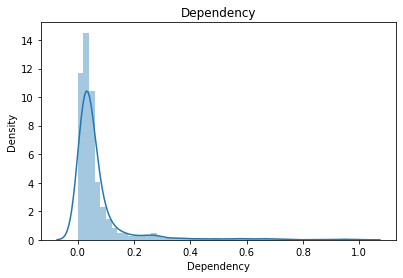

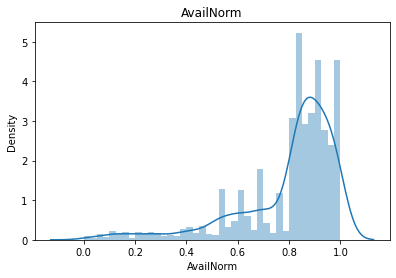

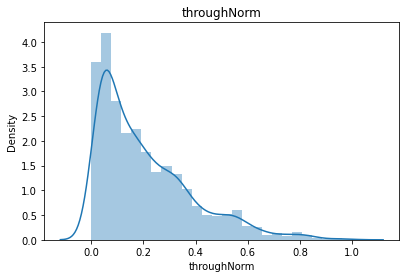

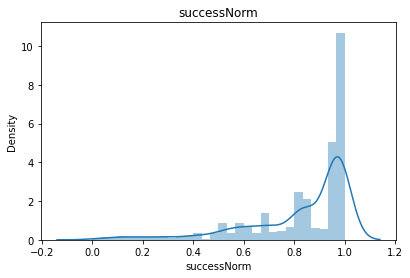

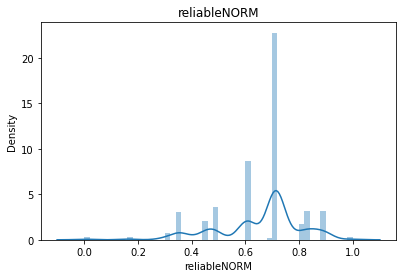

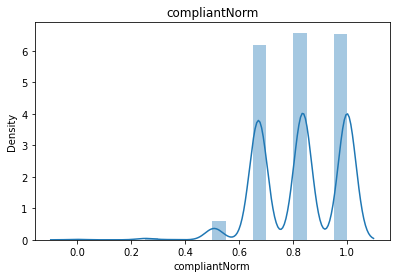

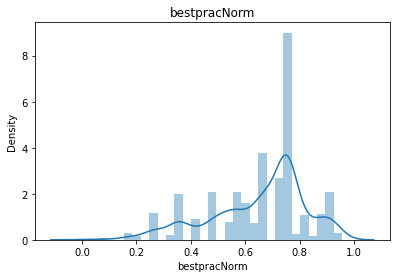

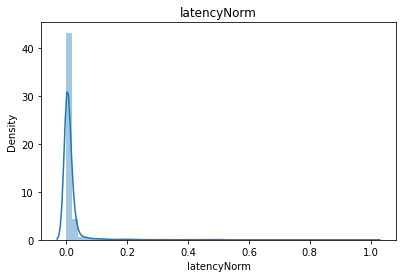

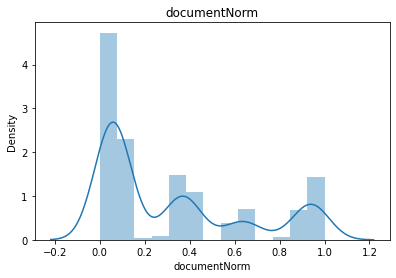

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Dependency'])
plt.title('Dependency')

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['AvailNorm'])
plt.title('AvailNorm')

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['throughNorm'])
plt.title('throughNorm')

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['successNorm'])
plt.title('successNorm')

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['reliableNORM'])
plt.title('reliableNORM')

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['compliantNorm'])
plt.title('compliantNorm')

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['bestpracNorm'])
plt.title('bestpracNorm')

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['latencyNorm'])
plt.title('latencyNorm')

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['documentNorm'])
plt.title('documentNorm')

In [15]:
from sklearn.tree import DecisionTreeClassifier
Dt = DecisionTreeClassifier()

In [16]:
Dt.fit(X_train,y_train)
y_pred = Dt.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9681274900398407

In [18]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(Dt, X = X_train, y = y_train, cv = 10)

In [19]:
print(accuracies)

[0.97014925 0.960199   0.95024876 0.94527363 0.94527363 0.95
 0.965      0.965      0.955      0.965     ]


In [20]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(X_test,y_test) 

RandomForestClassifier(n_estimators=10)

In [21]:
model.score(X_test,y_test)

0.99800796812749

In [22]:
y_predicted = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

0.99800796812749

In [24]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(model, X = X_train, y = y_train, cv = 10)

In [25]:
print("RandomForestClassifier",accuracies)

RandomForestClassifier [0.97512438 0.9800995  0.97512438 0.95024876 0.96517413 0.955
 0.975      0.98       0.975      0.955     ]
